# Payment Date Prediction 


### Importing related Libraries 

In [132]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [133]:
pd.options.display.float_format = '{:.5f}'.format

### Store the dataset into the Dataframe


In [134]:
df = pd.read_csv('dataset.csv')

### Check the shape of the dataframe


In [135]:
df.shape

(50099, 19)

### Check the Detail information of the dataframe

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50099 entries, 0 to 50098
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50099 non-null  object 
 1   cust_number             50099 non-null  object 
 2   name_customer           50099 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50099 non-null  int64  
 5   doc_id                  50099 non-null  int64  
 6   posting_date            50099 non-null  object 
 7   document_create_date    50099 non-null  int64  
 8   document_create_date.1  50099 non-null  int64  
 9   due_in_date             50099 non-null  int64  
 10  invoice_currency        50099 non-null  object 
 11  document type           50099 non-null  object 
 12  posting_id              50099 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       50099 non-null

### Display All the column names

In [137]:
print(*list(df.columns), sep='\n')

business_code
cust_number
name_customer
clear_date
buisness_year
doc_id
posting_date
document_create_date
document_create_date.1
due_in_date
invoice_currency
document type
posting_id
area_business
total_open_amount
baseline_create_date
cust_payment_terms
invoice_id
isOpen


### Describe the entire dataset

In [138]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50099.00000,50099.00000,50099.00000,50099.00000,50099.00000,50099.00000,0.00000,50099.00000,50099.00000,50093.00000,50099.00000
mean,2019.30707,2014112229.06004,20193527.82784,20193551.34206,20193692.40967,1.00000,nan,32456.56555,20193553.29885,2013215590.16699,0.20158
std,0.46128,291299161.30958,4501.71221,4487.77940,4475.90908,0.00000,nan,39259.24940,4488.33938,279557310.14804,0.40118
min,2019.00000,1928501756.00000,20181226.00000,20181230.00000,20181224.00000,1.00000,nan,0.72000,20181214.00000,1928501756.00000,0.00000
25%,2019.00000,1929343080.50000,20190506.00000,20190506.00000,20190524.00000,1.00000,nan,4943.48000,20190506.00000,1929343031.00000,0.00000
50%,2019.00000,1929968213.00000,20190909.00000,20190910.00000,20190927.00000,1.00000,nan,17700.00000,20190910.00000,1929968120.00000,0.00000
75%,2020.00000,1930621178.00000,20200131.00000,20200131.00000,20200217.00000,1.00000,nan,47385.59000,20200131.00000,1930621046.00000,0.00000
max,2020.00000,9500000133.00000,20200522.00000,20200522.00000,20200710.00000,1.00000,nan,668593.36000,20200522.00000,2960635652.00000,1.00000


# Data Cleaning

- Show top 5 records from the dataset

In [139]:
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200125,20200126,20200210,USD,RV,1,nan,54273.28000,20200126,NAH4,1930438491.00000,0
1,U001,200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190722,20190722,20190811,USD,RV,1,nan,79656.60000,20190722,NAD1,1929646410.00000,0
2,U001,200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190914,20190914,20190929,USD,RV,1,nan,2253.86000,20190914,NAA8,1929873765.00000,0
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200330,20200330,20200410,CAD,RV,1,nan,3299.70000,20200331,CA10,2960623488.00000,1
4,U001,200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191113,20191113,20191128,USD,RV,1,nan,33133.29000,20191113,NAH4,1930147974.00000,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [140]:
print(df.isnull().mean()*100)

business_code              0.00000
cust_number                0.00000
name_customer              0.00000
clear_date                20.15809
buisness_year              0.00000
doc_id                     0.00000
posting_date               0.00000
document_create_date       0.00000
document_create_date.1     0.00000
due_in_date                0.00000
invoice_currency           0.00000
document type              0.00000
posting_id                 0.00000
area_business            100.00000
total_open_amount          0.00000
baseline_create_date       0.00000
cust_payment_terms         0.00000
invoice_id                 0.01198
isOpen                     0.00000
dtype: float64


### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [141]:
df[['invoice_id', 'doc_id']].head(6)

,invoice_id,doc_id
0,1930438491.00000,1930438491
1,1929646410.00000,1929646410
2,1929873765.00000,1929873765
3,2960623488.00000,2960623488
4,1930147974.00000,1930147974
5,2960581231.00000,2960581231


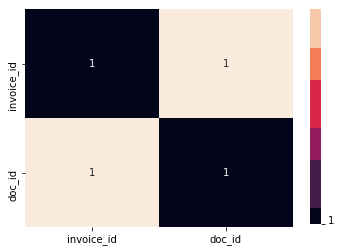

In [142]:
sns.heatmap(df[['invoice_id', 'doc_id']].corr(), annot=True);

From the heatmap,it is concluded that 'invoice_id' and 'doc_id' have same values.

#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



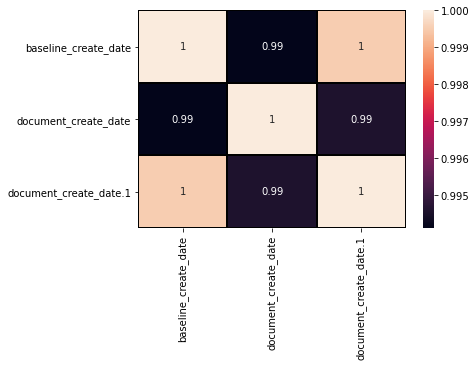

In [143]:
col = ['baseline_create_date','document_create_date','document_create_date.1']
sns.heatmap(df[col].corr(),linewidths=1, linecolor='black', annot=True);

From the heatmap above which shows the correlation among the mentioned 3 columns, it can be inferred that the all the 3 columns are almost same and 2 of them needs to be dropped.

#### Please check, Column 'posting_id' is constant columns or not


In [144]:
df['posting_id'].nunique()

1

As there is only 1 unique value in the whole column, it is a constant column and should be dropped.

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [145]:
print(df['isOpen'].value_counts())

0    40000
1    10099
Name: isOpen, dtype: int64


In [146]:
x = df[df['isOpen']==1].index
y = df[df['clear_date'].isna()].index
print(x.equals(y))

True


- 'isOpen' is not a constant column.
- 'isOpen' is indicator of whether an invoice is open or closed. 'isOpen' = 1 suggests that the invoice has not been cleared, which means that the 'clear_date' column for that row will contain NaN value. Therefore, 'isOpen' = 1 and 'clear_date' = NaN convey the same information. Hence, 'isOpen' is not relevant column for this proect.

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [147]:
del_col = ['area_business', 'posting_id', 'invoice_id', 'document_create_date', 'isOpen', 'document type', 'document_create_date.1']
df.drop(columns=del_col, inplace=True)

### Please check from the dataframe whether all the columns are removed or not 

In [148]:
isPresent = {i : i in df.columns for i in del_col}
print(isPresent)

{'area_business': False, 'posting_id': False, 'invoice_id': False, 'document_create_date': False, 'isOpen': False, 'document type': False, 'document_create_date.1': False}


### Show all the Duplicate rows from the dataframe

In [149]:
df[df.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,200769623,WAL-MAR in,12-03-2019 00:00,2019,1928870382,28-02-2019,20190315,USD,19557.41000,20190228,NAH4
2400,U001,200769623,WAL-MAR trust,28-08-2019 00:00,2019,1929758460,18-08-2019,20190902,USD,5600.41000,20190818,NAH4
2584,U001,200769623,WAL-MAR corporation,16-12-2019 00:00,2019,1930216806,04-12-2019,20191219,USD,35352.17000,20191204,NAH4
3755,U001,200769623,WAL-MAR,22-11-2019 00:00,2019,1930137035,12-11-2019,20191127,USD,2982.64000,20191112,NAH4
3873,CA02,140104409,LOB associates,NaN,2020,2960628616,14-04-2020,20200425,CAD,82975.82000,20200415,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49963,U001,200759878,SA us,29-01-2019 00:00,2019,1928613993,13-01-2019,20190128,USD,10968.24000,20190113,NAH4
49986,U001,200772670,ASSOCIAT foundation,12-06-2019 00:00,2019,1929403090,29-05-2019,20190613,USD,155837.53000,20190529,NAU5
49990,U001,200765011,MAINES llc,06-06-2019 00:00,2019,1929365364,22-05-2019,20190606,USD,4008.05000,20190522,NAA8
49991,U001,200704045,RA trust,25-10-2019 00:00,2019,1930001131,10-10-2019,20191025,USD,73002.24000,20191010,NAA8


### Display the Number of Duplicate Rows

In [150]:
print('No. of Duplicate Rows: ', df[df.duplicated()].shape[0])

No. of Duplicate Rows:  1162


### Drop all the Duplicate Rows

In [151]:
df.drop_duplicates(keep='first',inplace=True)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [152]:
df[df.duplicated()].shape[0]

0

### Check for the number of Rows and Columns in your dataset

In [153]:
df.shape

(48937, 12)

### Find out the total count of null values in each columns

In [154]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9779
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

# Data type Conversion 

### Please check the data type of each column of the dataframe

In [155]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year             int64
doc_id                    int64
posting_date             object
due_in_date               int64
invoice_currency         object
total_open_amount       float64
baseline_create_date      int64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [156]:
date_col=['clear_date','posting_date','due_in_date','baseline_create_date']
df[date_col].dtypes

clear_date              object
posting_date            object
due_in_date              int64
baseline_create_date     int64
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [157]:
df['clear_date'] = pd.to_datetime(df['clear_date'],errors = 'ignore')
df['posting_date'] = pd.to_datetime(df['posting_date'],errors = 'ignore')
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format= '%Y%m%d',errors = 'ignore')
df['baseline_create_date' ] = pd.to_datetime(df['baseline_create_date' ], format= '%Y%m%d',errors = 'ignore')

In [158]:
df[date_col]

,clear_date,posting_date,due_in_date,baseline_create_date
0,2020-11-02,2020-01-26,2020-02-10,2020-01-26
1,2019-08-08,2019-07-22,2019-08-11,2019-07-22
2,2019-12-30,2019-09-14,2019-09-29,2019-09-14
3,NaT,2020-03-30,2020-04-10,2020-03-31
4,2019-11-25,2019-11-13,2019-11-28,2019-11-13
...,...,...,...,...
50094,NaT,2020-06-03,2020-03-16,2020-03-06
50095,NaT,2020-06-03,2020-03-16,2020-03-06
50096,NaT,2020-06-03,2020-03-16,2020-03-06
50097,NaT,2020-06-03,2020-03-16,2020-03-06


### Please check the datatype of all the columns after conversion of the above 4 columns

In [159]:
df.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                    int64
doc_id                           int64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [160]:
df['invoice_currency'].value_counts()

USD    45011
CAD     3926
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [161]:
df['total_open_amount']

0       54273.28000
1       79656.60000
2        2253.86000
3        3299.70000
4       33133.29000
            ...    
50094   92832.27000
50095   92832.27000
50096   92832.27000
50097   92832.27000
50098   92832.27000
Name: total_open_amount, Length: 48937, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [162]:
df['converted_usd'] = np.where(df['invoice_currency'].isin(['USD']),df['total_open_amount'],df['total_open_amount']*0.7)

### Display the new "converted_usd" column values

In [163]:
df[['total_open_amount','invoice_currency','converted_usd']].head()

,total_open_amount,invoice_currency,converted_usd
0,54273.28000,USD,54273.28000
1,79656.60000,USD,79656.60000
2,2253.86000,USD,2253.86000
3,3299.70000,CAD,2309.79000
4,33133.29000,USD,33133.29000


### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [164]:
df['buisness_year'].value_counts()

2019    33975
2020    14962
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [165]:
df.drop(columns=['invoice_currency','total_open_amount'], inplace=True)

### Write a code to check the number of columns in dataframe

In [166]:
len(df.columns)

11

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [167]:
[col for col in df.columns if df[col].isnull().sum()>0]

['clear_date']

#### Find out the number of null values from the column that you got from the above code

In [168]:
df['clear_date'].isna().sum()

9779

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [169]:
maindata = pd.DataFrame(df[df['clear_date'].notna()])
maindata.reset_index(drop=True,inplace=True)

In [170]:
nulldata = pd.DataFrame(df[df['clear_date'].isna()])
nulldata.reset_index(drop=True,inplace=True)

### Check the number of Rows and Columns for both the dataframes 

In [171]:
maindata.shape

(39158, 11)

In [172]:
nulldata.shape

(9779, 11)

### Display the 5 records from maindata and nulldata dataframes

In [173]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.28000
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.60000
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.86000
3,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.29000
4,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.08800


In [174]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79000
1,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02000
2,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.59000
3,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65000
4,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06000


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [175]:
maindata['Delay'] = maindata['clear_date'] - maindata['due_in_date']

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [176]:
avgdelay = maindata.groupby('name_customer')['Delay'].mean(numeric_only=False)
avgdelay

name_customer
11078 us               -69 days +00:00:00
17135 associates       -10 days +00:00:00
17135 llc               -3 days +00:00:00
236008 associates       -3 days +00:00:00
99 CE                    16 days 00:00:00
                              ...        
YEN BROS corp             0 days 00:00:00
YEN BROS corporation    -1 days +12:00:00
YEN BROS llc            -2 days +00:00:00
ZARCO co                -1 days +00:00:00
ZIYAD  us              -83 days +00:00:00
Name: Delay, Length: 3889, dtype: timedelta64[ns]

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [177]:
maindata['avg_delay'] = maindata['name_customer'].map(avgdelay)

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [178]:
maindata['avg_delay'] = maindata['avg_delay'].dt.total_seconds()

### Display the maindata dataframe 

In [179]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.28000,266 days,261502.66512
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.60000,-3 days,2160000.00000
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.86000,92 days,2324945.45455
3,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.29000,-3 days,416007.69231
4,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.08800,-175 days,4473600.00000


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [180]:
maindata.drop(columns=['Delay','clear_date'], inplace=True)

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [181]:
X = maindata.drop(columns=['avg_delay'], inplace=False)

In [182]:
y = maindata['avg_delay']

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [183]:
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X,y,test_size=0.4, shuffle=True)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [184]:
print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)
print('X_loc_test: ',X_loc_test.shape)
print('y_loc_test: ',y_loc_test.shape)

X_train:  (23494, 10)
y_train:  (23494,)
X_loc_test:  (15664, 10)
y_loc_test:  (15664,)


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [185]:
X_val, X_test, y_val, y_test = train_test_split(X_loc_test,y_loc_test,test_size=0.5, shuffle=False)

### Please check for the number of rows and columns of all the 4 dataframes 

In [186]:
print('X_val: ',X_val.shape)
print('y_val: ',y_val.shape)
print('X_test: ',X_test.shape)
print('y_test: ',y_test.shape)

X_val:  (7832, 10)
y_val:  (7832,)
X_test:  (7832, 10)
y_test:  (7832,)


# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

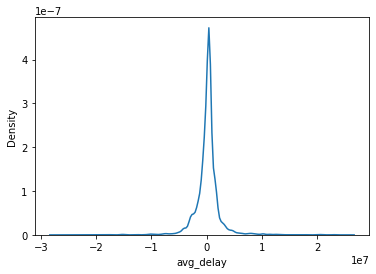

In [187]:
sns.kdeplot(y);

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [188]:
temp = pd.DataFrame(X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count())
temp

,name_customer,doc_id
0,11078 us,1
1,17135 associates,1
2,17135 llc,1
3,236008 associates,1
4,99 CE associates,1
...,...,...
3067,Y H llc,2
3068,Y H trust,2
3069,YEN BROS corporation,1
3070,YEN BROS llc,1


### You can make another distribution plot of the "doc_id" column from x_train



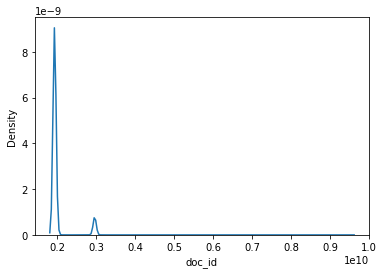

In [189]:
sns.kdeplot(X_train['doc_id']);

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


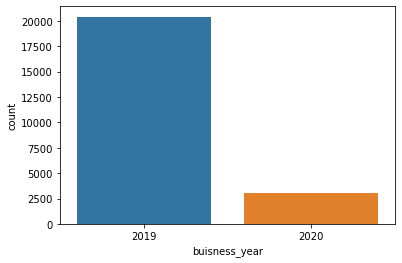

In [190]:
sns.countplot(x = X_train['buisness_year']);

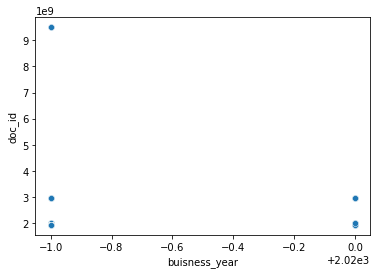

In [191]:
sns.scatterplot(x=X_train["buisness_year"], y=X_train["doc_id"]);

# Feature Engineering 

### Display and describe the X_train dataframe 

In [192]:
X_train.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
13160,U001,200769623,WAL-MAR in,2019,1929939155,2019-09-29,2019-10-14,2019-09-29,NAH4,256.91000
37629,U001,100036722,SUNN in,2019,1928634260,2019-01-16,2019-01-26,2019-01-16,NA10,9919.20000
10674,U001,200915438,GROC corporation,2019,1929340793,2019-05-22,2019-06-06,2019-05-22,NAA8,17541.50000
28054,U001,200714710,SYSCO llc,2019,1929003979,2019-03-21,2019-04-05,2019-03-21,NAA8,3025.79000
26504,U001,200705089,JETR co,2019,1929490992,2019-06-21,2019-07-06,2019-06-21,NAA8,1392.52000


In [193]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.00000,23494.00000,23494.00000
mean,2019.13140,2013918841.94803,30837.45457
std,0.33784,299055582.51392,36902.64607
min,2019.00000,1928501756.00000,0.79000
25%,2019.00000,1929181132.50000,4518.61850
50%,2019.00000,1929734082.50000,16890.18500
75%,2019.00000,1930207972.50000,45546.35750
max,2020.00000,9500000133.00000,668593.36000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [194]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [195]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [196]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [197]:
X_train[['business_code', 'business_code_enc']]

,business_code,business_code_enc
13160,U001,1
37629,U001,1
10674,U001,1
28054,U001,1
26504,U001,1
...,...,...
36109,U001,1
68,U001,1
13581,U001,1
33473,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [198]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [199]:
X_train, X_val, X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [200]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [201]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [202]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [203]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [204]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [205]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [206]:
X_train.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [207]:
X_test.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [208]:
X_val.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [209]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [210]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [211]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year


X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year


### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [212]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [213]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [214]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [215]:
X_train.dtypes

cust_number                 int32
buisness_year               int64
doc_id                      int64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [216]:
X_val.dtypes

cust_number                 int32
buisness_year               int64
doc_id                      int64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [217]:
X_test.dtypes

cust_number                 int32
buisness_year               int64
doc_id                      int64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [218]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [219]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [220]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [221]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [222]:
train=X_train.copy()
handling_correlation(train.copy(),0.85)

['month_of_due',
 'year_of_createdate',
 'day_of_createdate',
 'year_of_postingdate',
 'year_of_due']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

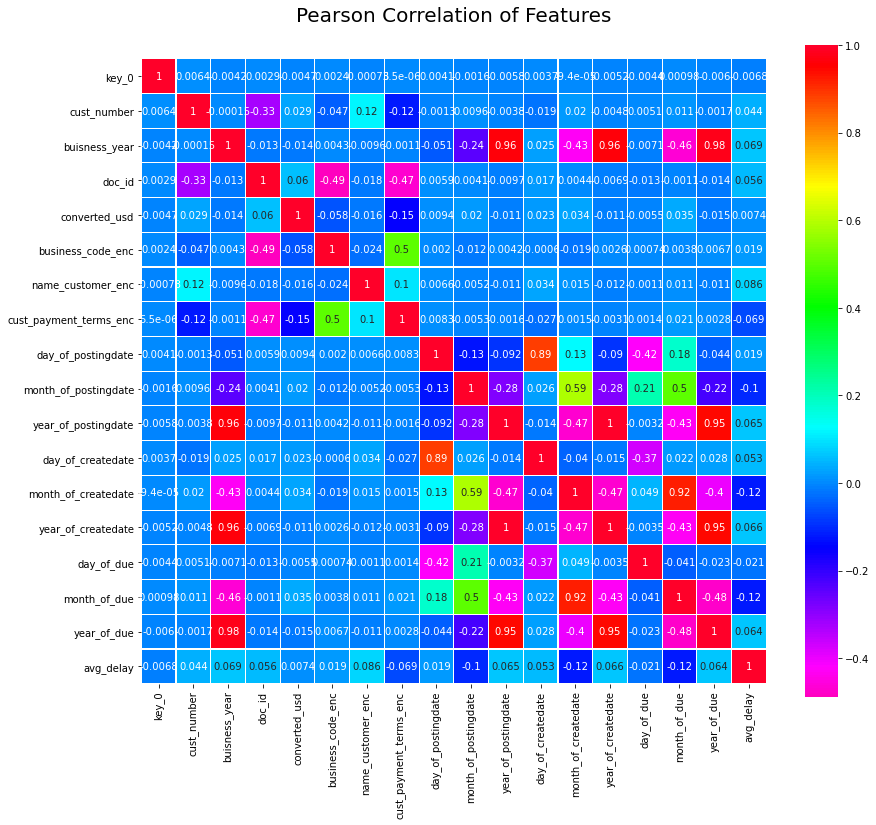

In [223]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True);

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [224]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [225]:
sel.variances_

array([1.80069578e+15, 1.14130538e-01, 8.94304347e+16, 1.36174732e+09,
       2.83528297e-01, 1.05048399e+06, 1.29517281e+02, 8.11330986e+01,
       1.19305092e+01, 1.14199055e-01, 7.70298167e+01, 1.23091361e+01,
       1.14306460e-01, 7.68721106e+01, 1.20991277e+01, 1.17536683e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [226]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [227]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [228]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [229]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2421902.6815650756

### Display The Comparison Lists

In [230]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[5807891408694.386],[0.048603426486837464],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [231]:
from sklearn.svm import SVR
Algorithm.append('SVR')
svregressor = SVR()
svregressor.fit(X_train, y_train)
predicted= svregressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [232]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [233]:
predict_test= svregressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2473272.3758675754

### Display The Comparison Lists

In [234]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR'],[5807891408694.386, 6116768241892.579],[0.048603426486837464, -0.0019940003697398456],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [235]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegressor')
decisiontree = DecisionTreeRegressor()
decisiontree.fit(X_train, y_train)
predicted= decisiontree.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [236]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [237]:
predict_test= decisiontree.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

3118390.9624199006

### Display The Comparison Lists

In [238]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR', 'DecisionTreeRegressor'],[5807891408694.386, 6116768241892.579, 8955022972086.598],[0.048603426486837464, -0.0019940003697398456, -0.46693138212274055],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [239]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegressor')
randomforest = RandomForestRegressor()
randomforest.fit(X_train, y_train)
predicted= randomforest.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [240]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [241]:
predict_test= randomforest.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2221280.482481205

### Display The Comparison Lists


In [242]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor'],[5807891408694.386, 6116768241892.579, 8955022972086.598, 4730815729353.166],[0.048603426486837464, -0.0019940003697398456, -0.46693138212274055, 0.2250402843119662],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [243]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [244]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [245]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2278231.2017146046

### Display The Comparison Lists


In [246]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGB Regressor'],[5807891408694.386, 6116768241892.579, 8955022972086.598, 4730815729353.166, 4882168946849.194],[0.048603426486837464, -0.0019940003697398456, -0.46693138212274055, 0.2250402843119662, 0.20024696047324042],

## You need to make the comparison list into a comparison dataframe 

In [247]:
results = pd.DataFrame({'Algorithm':Algorithm, 'MSE_Score':MSE_Score, 'R2_Score':R2_Score})

In [248]:
results

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,5807891408694.38574,0.04860
1,SVR,6116768241892.57910,-0.00199
2,DecisionTreeRegressor,8955022972086.59766,-0.46693
3,RandomForestRegressor,4730815729353.16602,0.22504
4,XGB Regressor,4882168946849.19434,0.20025


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [249]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [250]:
mean_squared_error(y_test,predictedfinal,squared=False)

2209563.066954459

### Calculate the mean Square Error for validation dataset

In [251]:
mean_squared_error(y_val, predict_testfinal, squared=False)

2278231.2017146046

### Calculate the R2 score for test

In [252]:
r2_score(y_test, predictedfinal)

0.20024696047324042

### Calculate the R2 score for Validation

In [253]:
r2_score(y_val, predict_testfinal)

0.14873410454714497

### Calculate the Accuracy for train Dataset 

In [254]:
regressorfinal.score(X_train,y_train)*100

66.49771951455257

### Calculate the accuracy for validation

In [255]:
regressorfinal.score(X_val,y_val)*100

14.873410454714497

### Calculate the accuracy for test

In [256]:
regressorfinal.score(X_test,y_test)*100

20.024696047324042

## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

I chose "XGB Regressor" as my final machine learning model because it has the least MSE_Score and the highest R2_Score among all the models.

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [257]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79000
1,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02000
2,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.59000
3,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65000
4,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06000


### Check for the number of rows and columns in the nulldata

In [258]:
nulldata.shape

(9779, 11)

### Check the Description and Information of the nulldata 

In [259]:
nulldata.describe()

,buisness_year,doc_id,converted_usd
count,9779.00000,9779.00000,9779.00000
mean,2020.00000,2015729693.99080,32395.55708
std,0.00000,282498285.87095,35393.87086
min,2020.00000,1930535090.00000,0.72000
25%,2020.00000,1930659888.00000,5731.95000
50%,2020.00000,1930731833.00000,19403.93000
75%,2020.00000,1930821452.50000,48806.64000
max,2020.00000,2960635652.00000,653644.80000


In [260]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779 entries, 0 to 9778
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9779 non-null   object        
 1   cust_number           9779 non-null   object        
 2   name_customer         9779 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9779 non-null   int64         
 5   doc_id                9779 non-null   int64         
 6   posting_date          9779 non-null   datetime64[ns]
 7   due_in_date           9779 non-null   datetime64[ns]
 8   baseline_create_date  9779 non-null   datetime64[ns]
 9   cust_payment_terms    9779 non-null   object        
 10  converted_usd         9779 non-null   float64       
dtypes: datetime64[ns](4), float64(1), int64(2), object(4)
memory usage: 840.5+ KB


### Storing the Nulldata into a different dataset 
# for BACKUP

In [261]:
nulldata1 = nulldata.copy()

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [262]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [263]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [264]:
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year

nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [265]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder1.transform(nulldata['name_customer'])

### Check for the datatypes of all the columns of Nulldata

In [266]:
nulldata.dtypes

business_code                     object
cust_number                        int32
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int32
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
cust_payment_ter

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [267]:
nulldata.drop(columns=['business_code',"baseline_create_date","due_in_date","posting_date","name_customer","clear_date",
                       "cust_payment_terms",'day_of_cleardate',"month_of_cleardate","year_of_cleardate"], inplace=True)

In [268]:
nulldata.shape

(9779, 16)

### Check the information of the "nulldata" dataframe

In [269]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779 entries, 0 to 9778
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9779 non-null   int32  
 1   buisness_year           9779 non-null   int64  
 2   doc_id                  9779 non-null   int64  
 3   converted_usd           9779 non-null   float64
 4   business_code_enc       9779 non-null   int32  
 5   day_of_postingdate      9779 non-null   int64  
 6   month_of_postingdate    9779 non-null   int64  
 7   year_of_postingdate     9779 non-null   int64  
 8   day_of_createdate       9779 non-null   int64  
 9   month_of_createdate     9779 non-null   int64  
 10  year_of_createdate      9779 non-null   int64  
 11  day_of_due              9779 non-null   int64  
 12  month_of_due            9779 non-null   int64  
 13  year_of_due             9779 non-null   int64  
 14  cust_payment_terms_enc  9779 non-null   

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [270]:
print(nulldata.info(), X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779 entries, 0 to 9778
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9779 non-null   int32  
 1   buisness_year           9779 non-null   int64  
 2   doc_id                  9779 non-null   int64  
 3   converted_usd           9779 non-null   float64
 4   business_code_enc       9779 non-null   int32  
 5   day_of_postingdate      9779 non-null   int64  
 6   month_of_postingdate    9779 non-null   int64  
 7   year_of_postingdate     9779 non-null   int64  
 8   day_of_createdate       9779 non-null   int64  
 9   month_of_createdate     9779 non-null   int64  
 10  year_of_createdate      9779 non-null   int64  
 11  day_of_due              9779 non-null   int64  
 12  month_of_due            9779 non-null   int64  
 13  year_of_due             9779 non-null   int64  
 14  cust_payment_terms_enc  9779 non-null   

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [271]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [272]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_createdate', 'month_of_createdate',
       'year_of_createdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [273]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [274]:
nulldata2.head()

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
0,140105686,2020,2960623488,2309.79000,66,66,5,30,3,2020,31,3,2020,10,4,2020
1,200744019,2020,1930659387,11173.02000,66,66,19,19,3,2020,19,3,2020,3,4,2020
2,200418007,2020,1930610806,3525.59000,66,66,19,3,11,2020,11,3,2020,26,3,2020
3,200739534,2020,1930788296,121105.65000,66,66,19,15,4,2020,15,4,2020,30,4,2020
4,200353024,2020,1930817482,3726.06000,66,66,34,23,4,2020,16,4,2020,26,4,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [275]:
final_result = regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [276]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [277]:
final_result =pd.DataFrame(final_result)
final_result

,avg_delay
0,769843.37500
1,-3131941.50000
2,-2168973.50000
3,-2011411.62500
4,-3136578.50000
...,...
9774,-1526195.25000
9775,-1526195.25000
9776,-1526195.25000
9777,-1526195.25000


### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [278]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [279]:
Final.head()

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,0,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79000,769843.37500
1,1,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02000,-3131941.50000
2,2,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.59000,-2168973.50000
3,3,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65000,-2011411.62500
4,4,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06000,-3136578.50000


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [280]:
Final.shape

(9779, 13)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [281]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [282]:
Final['clear_date']

0      2020-04-18 21:50:43.375
1      2020-02-26 18:00:58.500
2      2020-02-29 21:30:26.500
3      2020-04-06 17:16:28.375
4      2020-03-20 16:43:41.500
                 ...          
9774   2020-02-27 08:03:24.750
9775   2020-02-27 08:03:24.750
9776   2020-02-27 08:03:24.750
9777   2020-02-27 08:03:24.750
9778   2020-02-27 08:03:24.750
Name: clear_date, Length: 9779, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [283]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [284]:
Final['avg_delay']

0        8.00000
1      -37.00000
2      -26.00000
3      -24.00000
4      -37.00000
          ...   
9774   -18.00000
9775   -18.00000
9776   -18.00000
9777   -18.00000
9778   -18.00000
Name: avg_delay, Length: 9779, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [285]:
bins= [0,15,30,45,60,100]
labels =['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [286]:
Final.drop(columns=['key_0','avg_delay'], inplace=True)

### Display the count of each categoty of new "Aging Bucket" column 

In [287]:
Final['Aging Bucket'].value_counts()

0-15               519
16-30              115
31-45               28
46-60                7
Greatar than 60      0
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [288]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,140105686,SYSC llc,2020-04-18 21:50:43.375,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79000,0-15
1,U001,200744019,TARG us,2020-02-26 18:00:58.500,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02000,NaN
2,U001,200418007,AM,2020-02-29 21:30:26.500,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.59000,NaN
3,U001,200739534,OK systems,2020-04-06 17:16:28.375,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65000,NaN
4,U001,200353024,DECA corporation,2020-03-20 16:43:41.500,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9774,CA02,140106408,WAL-M corp,2020-02-27 08:03:24.750,2020,2960618884,2020-06-03,2020-03-16,2020-03-06,CA10,64982.58900,NaN
9775,CA02,140106408,WAL-M corp,2020-02-27 08:03:24.750,2020,2960618885,2020-06-03,2020-03-16,2020-03-06,CA10,64982.58900,NaN
9776,CA02,140106408,WAL-M corp,2020-02-27 08:03:24.750,2020,2960618886,2020-06-03,2020-03-16,2020-03-06,CA10,64982.58900,NaN
9777,CA02,140106408,WAL-M corp,2020-02-27 08:03:24.750,2020,2960618887,2020-06-03,2020-03-16,2020-03-06,CA10,64982.58900,NaN


### Store this dataframe into the .csv format

In [289]:
Final.to_csv('HRC60275WK_RAHOOL_SHIVDARSHI.csv')

# END OF THE PROJECT

In [290]:
import pickle
with open('model.sav', 'wb') as files:
    pickle.dump(regressorfinal, files)